In [1]:
# load library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# setting output
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)

## Load & Check Dataset

In [3]:
df = pd.read_csv("application_train.csv")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
# make a copy of df
train = df.copy()

In [5]:
# check columns
train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APART

In [6]:
# check data shape
train.shape

(307511, 122)

## Data Preprocessing

Check & handle:
* Missing Values
* Duplicated Values
* Outliers
* Inconsistent Data
* Imbalanced Class

### Missing Values & Duplicated Values

In [7]:
# drop SK_ID_CURR column
train = train.drop(["SK_ID_CURR"],1)

In [8]:
# missing values check
train.isna().sum()

TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE               

In [9]:
# handle missing values
# drop column with missing values > 50% of rows
for col in train:
    if train[col].isna().sum() > (train.shape[0])/2:
        train = train.drop(col, 1)

In [10]:
# check 
train.isna().sum()

TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE                           0
FLAG_EMAIL               

In [11]:
# drop more columns with missing values close to 50% of rows
train.drop(["YEARS_BEGINEXPLUATATION_AVG", "FLOORSMAX_AVG", "YEARS_BEGINEXPLUATATION_MODE","FLOORSMAX_MODE",
           "YEARS_BEGINEXPLUATATION_MEDI", "FLOORSMAX_MEDI", "TOTALAREA_MODE", "EMERGENCYSTATE_MODE"], 1, inplace=True)

In [12]:
# check
train.isna().sum()

TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
OCCUPATION_TYPE                96391
C

In [13]:
# columns with binary variable (0/1)
bincol = ["FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE",
             "FLAG_PHONE", "FLAG_EMAIL","REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION",
             "LIVE_REGION_NOT_WORK_REGION", "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY",
              "LIVE_CITY_NOT_WORK_CITY","FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4",
              "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8",
              "FLAG_DOCUMENT_9","FLAG_DOCUMENT_10","FLAG_DOCUMENT_11","FLAG_DOCUMENT_12",
               "FLAG_DOCUMENT_13","FLAG_DOCUMENT_14","FLAG_DOCUMENT_15","FLAG_DOCUMENT_16",
               "FLAG_DOCUMENT_17","FLAG_DOCUMENT_18","FLAG_DOCUMENT_19","FLAG_DOCUMENT_20",
               "FLAG_DOCUMENT_21"]

In [14]:
# change into cat col
for col in bincol:
    train[col] = train[col].replace({0:'No'})
    train[col] = train[col].replace({1:'Yes'})

In [15]:
# categorical columns
catcol = ["NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_TYPE_SUITE", "NAME_INCOME_TYPE",
          "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START",
          "ORGANIZATION_TYPE", "FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE",
             "FLAG_PHONE", "FLAG_EMAIL","REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION",
             "LIVE_REGION_NOT_WORK_REGION", "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY",
              "LIVE_CITY_NOT_WORK_CITY","FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4",
              "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8",
              "FLAG_DOCUMENT_9","FLAG_DOCUMENT_10","FLAG_DOCUMENT_11","FLAG_DOCUMENT_12",
               "FLAG_DOCUMENT_13","FLAG_DOCUMENT_14","FLAG_DOCUMENT_15","FLAG_DOCUMENT_16",
               "FLAG_DOCUMENT_17","FLAG_DOCUMENT_18","FLAG_DOCUMENT_19","FLAG_DOCUMENT_20",
               "FLAG_DOCUMENT_21"]

In [16]:
# get numerical columns
numcol = []
for col in train:
    if col not in catcol:
        numcol.append(col)

In [17]:
# drop TARGET from numcol
numcol.remove("TARGET")

In [18]:
# stat desc for categorical columns
train[catcol].describe()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
count,307511,307511,307511,307511,306219,307511,307511,307511,307511,211120,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511
unique,2,3,2,2,7,8,5,6,6,18,7,58,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,Yes,Yes,No,Yes,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
freq,278232,202448,202924,213312,248526,158774,218391,196432,272868,55186,53901,67992,307510,252125,246203,306937,221080,290069,302854,291899,295008,283472,236644,252296,307498,218340,307486,302863,280433,307452,282487,306313,307504,306308,307509,306427,306608,307139,304458,307429,305011,307328,307355,307408


In [19]:
# stat desc for numerical columns
train[numcol].describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,2.152665,2.052463,2.031521,12.063419,5.143927e-01,0.510853,1.422245,0.143421,1.405292,0.100049,-962.858788,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.910682,0.509034,0.502737,3.265832,1.910602e-01,0.194844,2.400989,0.446698,2.379803,0.362291,826.808487,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,1.000000,1.000000,1.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,2.000000,2.000000,2.000000,10.000000,3.924574e-01,0.370650,0.000000,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,2.000000,2.000000,2.000000,12.000000,5.659614e-01,0.535276,0.000000,0.000000,0.000000,0.000000,-757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,3.000000,2.000000,2.000000,14.000000,6.636171e-01,0.669057,2.000000,0.000000,2.000000,0.000000,-274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,20.000000,3.000000,3.000000,23.000000,8.549997e-01,0.896010,348.000000,34.000000,344.000000,24.000000,0.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [20]:
# handle missing values categorical col using mode
for col in train[catcol]:
    train[col].fillna(train[col].mode()[0], inplace=True)

In [21]:
# check misssing values on cat var
train[catcol].isna().sum()

NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
OCCUPATION_TYPE                0
WEEKDAY_APPR_PROCESS_START     0
ORGANIZATION_TYPE              0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
FLAG_DOCUMENT_2                0
FLAG_DOCUMENT_3                0
FLAG_DOCUMENT_4                0
FLAG_DOCUMENT_5                0
FLAG_DOCUMENT_6                0
FLAG_DOCUMENT_7                0
FLAG_DOCUM

In [22]:
# handle missing values numerical data using median
for col in train[numcol]:
    train[col].fillna(train[col].median(), inplace=True)

In [23]:
# check misssing values on num var
train[numcol].isna().sum()

CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
HOUR_APPR_PROCESS_START        0
EXT_SOURCE_2                   0
EXT_SOURCE_3                   0
OBS_30_CNT_SOCIAL_CIRCLE       0
DEF_30_CNT_SOCIAL_CIRCLE       0
OBS_60_CNT_SOCIAL_CIRCLE       0
DEF_60_CNT_SOCIAL_CIRCLE       0
DAYS_LAST_PHONE_CHANGE         0
AMT_REQ_CREDIT_BUREAU_HOUR     0
AMT_REQ_CREDIT_BUREAU_DAY      0
AMT_REQ_CREDIT_BUREAU_WEEK     0
AMT_REQ_CREDIT_BUREAU_MON      0
AMT_REQ_CREDIT_BUREAU_QRT      0
AMT_REQ_CREDIT_BUREAU_YEAR     0
dtype: int64

In [24]:
# check duplicated values
print(train.duplicated().sum())

0


### Outliers & Inconsistent Data

In [25]:
# handle outlier using z-score
from scipy import stats
print(f'jumlah baris sebelum difilter : {len(train)}')

filtered_entries = np.array([True]*len(train))
for col in numcol:
    zscore = abs(stats.zscore(train[col]))
    filtered_entries = (zscore < 3) & filtered_entries
train2 = train[filtered_entries]

print(f"jumlah baris setelah difilter: {len(train2)}")

jumlah baris sebelum difilter : 307511
jumlah baris setelah difilter: 256619


In [26]:
# check new dataset
train2.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Yes,Yes,No,Yes,Yes,No,Core staff,2.0,1,1,MONDAY,11,No,No,No,No,No,No,School,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Yes,Yes,Yes,Yes,Yes,No,Laborers,1.0,2,2,MONDAY,9,No,No,No,No,No,No,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Yes,Yes,No,Yes,No,No,Laborers,2.0,2,2,WEDNESDAY,17,No,No,No,No,No,No,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,-617.0,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0.0,0.0,0.0,0.0,0.0,1.0
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Yes,Yes,No,Yes,No,No,Core staff,1.0,2,2,THURSDAY,11,No,No,No,No,Yes,Yes,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,-1106.0,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,0.0,0.0,0.0,0.0,0.0,0.0
5,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,Yes,Yes,Yes,Yes,Yes,No,Laborers,2.0,2,2,WEDNESDAY,16,No,No,No,No,No,No,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0.0,0.0,0.0,0.0,1.0,1.0


In [27]:
# check inconsistent data
for col in train2[catcol]:
    print(train2[col].value_counts(), '\n')

Cash loans         231475
Revolving loans     25144
Name: NAME_CONTRACT_TYPE, dtype: int64 

F      169386
M       87231
XNA         2
Name: CODE_GENDER, dtype: int64 

N    171090
Y     85529
Name: FLAG_OWN_CAR, dtype: int64 

Y    177779
N     78840
Name: FLAG_OWN_REALTY, dtype: int64 

Unaccompanied      208186
Family              33725
Spouse, partner      9473
Children             2788
Other_B              1492
Other_A               723
Group of people       232
Name: NAME_TYPE_SUITE, dtype: int64 

Working                 135618
Commercial associate     56719
Pensioner                46548
State servant            17690
Unemployed                  18
Student                     17
Businessman                  5
Maternity leave              4
Name: NAME_INCOME_TYPE, dtype: int64 

Secondary / secondary special    184761
Higher education                  59959
Incomplete higher                  8473
Lower secondary                    3308
Academic degree                     118
Nam

In [28]:
# gender feature
train2["CODE_GENDER"].value_counts()

F      169386
M       87231
XNA         2
Name: CODE_GENDER, dtype: int64

In [29]:
# replace XNA with the mode
train2["CODE_GENDER"].replace({"XNA":"F"}, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [30]:
# Check again
train2["CODE_GENDER"].value_counts()

F    169388
M     87231
Name: CODE_GENDER, dtype: int64

In [31]:
# drop ORGANIZATION_TYPE cause it has many unique values
train2.drop(["ORGANIZATION_TYPE"],1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [32]:
# check
train2.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCI

In [33]:
# NAME_FAMILY_STATUS feature
train2["NAME_FAMILY_STATUS"].value_counts()

Married                 162452
Single / not married     38745
Civil marriage           25271
Separated                16508
Widow                    13641
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [34]:
# replace "Unknown" with the mode
train2["NAME_FAMILY_STATUS"].replace({"Unknown":"Married"}, inplace=True)

In [35]:
# check
train2["NAME_FAMILY_STATUS"].value_counts()

Married                 162454
Single / not married     38745
Civil marriage           25271
Separated                16508
Widow                    13641
Name: NAME_FAMILY_STATUS, dtype: int64

In [36]:
train2.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Yes,Yes,No,Yes,Yes,No,Core staff,2.0,1,1,MONDAY,11,No,No,No,No,No,No,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Yes,Yes,Yes,Yes,Yes,No,Laborers,1.0,2,2,MONDAY,9,No,No,No,No,No,No,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Yes,Yes,No,Yes,No,No,Laborers,2.0,2,2,WEDNESDAY,17,No,No,No,No,No,No,0.650442,0.535276,2.0,0.0,2.0,0.0,-617.0,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0.0,0.0,0.0,0.0,0.0,1.0
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Yes,Yes,No,Yes,No,No,Core staff,1.0,2,2,THURSDAY,11,No,No,No,No,Yes,Yes,0.322738,0.535276,0.0,0.0,0.0,0.0,-1106.0,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,0.0,0.0,0.0,0.0,0.0,0.0
5,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,Yes,Yes,Yes,Yes,Yes,No,Laborers,2.0,2,2,WEDNESDAY,16,No,No,No,No,No,No,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0.0,0.0,0.0,0.0,1.0,1.0


In [37]:
# create new df with reordering columns [target, catvar, numvar]
train3 = train2[["TARGET", "NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_TYPE_SUITE", "NAME_INCOME_TYPE",
          "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START",
           "FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE",
             "FLAG_PHONE", "FLAG_EMAIL","REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION",
             "LIVE_REGION_NOT_WORK_REGION", "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY",
              "LIVE_CITY_NOT_WORK_CITY","FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4",
              "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8",
              "FLAG_DOCUMENT_9","FLAG_DOCUMENT_10","FLAG_DOCUMENT_11","FLAG_DOCUMENT_12",
               "FLAG_DOCUMENT_13","FLAG_DOCUMENT_14","FLAG_DOCUMENT_15","FLAG_DOCUMENT_16",
               "FLAG_DOCUMENT_17","FLAG_DOCUMENT_18","FLAG_DOCUMENT_19","FLAG_DOCUMENT_20",
               "FLAG_DOCUMENT_21", 'CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE',
                'REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH',
                'CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','HOUR_APPR_PROCESS_START',
                'EXT_SOURCE_2','EXT_SOURCE_3','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
                'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE',
                'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
                'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT',
                'AMT_REQ_CREDIT_BUREAU_YEAR']]

In [38]:
train3.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,0,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,Yes,Yes,No,Yes,Yes,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,2.0,1,1,11,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,1.0,2,2,9,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Yes,Yes,No,Yes,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,2.0,2,2,17,0.650442,0.535276,2.0,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Yes,Yes,No,Yes,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,1.0,2,2,11,0.322738,0.535276,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,Cash loans,M,N,Y,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,99000.0,490495.5,27517.5,454500.0,0.035792,-16941,-1588,-4970.0,-477,2.0,2,2,16,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,0.0,0.0,0.0,0.0,1.0,1.0


### Imbalanced Class

In [39]:
yes = train3['TARGET'].value_counts()[1]
no = train3['TARGET'].value_counts()[0]
yes_per = yes / train3.shape[0] * 100
no_per = no / train3.shape[0] * 100

print('{} of {} clients with payment difficulties and it is the {:.2f}% of the data set.'.format(yes, train3.shape[0], yes_per))
print('{} of {} clients without payment difficulties and it is the {:.2f}% of the data set.'.format(no, train3.shape[0], no_per))

21015 of 256619 clients with payment difficulties and it is the 8.19% of the data set.
235604 of 256619 clients without payment difficulties and it is the 91.81% of the data set.


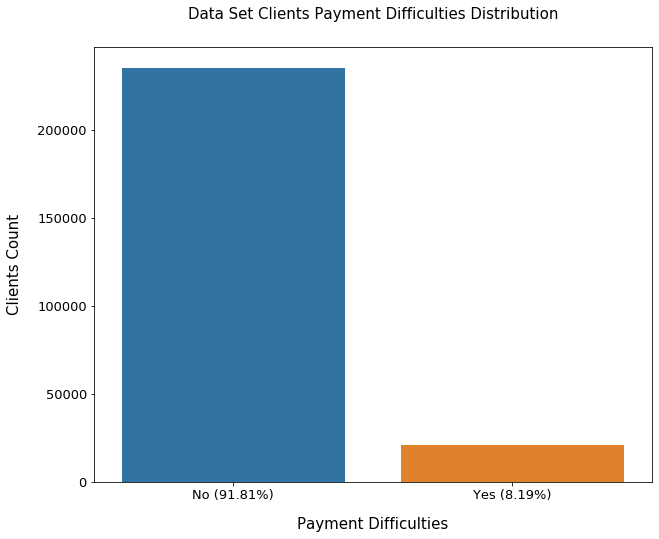

In [40]:
plt.figure(figsize = (10, 8))
sns.countplot(train3['TARGET'])

plt.xlabel('Payment Difficulties', size = 15, labelpad = 15)
plt.ylabel('Clients Count', size = 15, labelpad = 15)
plt.xticks((0, 1), ['No ({0:.2f}%)'.format(no_per), 'Yes ({0:.2f}%)'.format(yes_per)])
plt.tick_params(axis = 'x', labelsize = 13)
plt.tick_params(axis = 'y', labelsize = 13)

plt.title('Data Set Clients Payment Difficulties Distribution', size = 15, y = 1.05)
plt.show()

In [41]:
# specify respon var & pred var
X_train = train3.drop(columns=['TARGET'], axis=1)
y_train = train3['TARGET']

In [42]:
# resampling using SMOTE NC
from imblearn.over_sampling import SMOTENC

sm = SMOTENC(categorical_features=[i for i in range(len(catcol))], random_state=123)
X_smote, y_smote = sm.fit_resample(X_train, y_train)

In [43]:
y_smote.value_counts()

1    235604
0    235604
Name: TARGET, dtype: int64

In [44]:
X_smote.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,Yes,Yes,No,Yes,Yes,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,2.0,1,1,11,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,1.0,2,2,9,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Yes,Yes,No,Yes,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,2.0,2,2,17,0.650442,0.535276,2.0,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Yes,Yes,No,Yes,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,1.0,2,2,11,0.322738,0.535276,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Cash loans,M,N,Y,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,99000.0,490495.5,27517.5,454500.0,0.035792,-16941,-1588,-4970.0,-477,2.0,2,2,16,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,0.0,0.0,0.0,0.0,1.0,1.0


In [45]:
X_smote.shape

(471208, 70)

In [46]:
X_smote.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,471208.000000,471208.000000,4.712080e+05,471208.000000,4.712080e+05,471208.000000,471208.000000,471208.000000,471208.000000,471208.000000,471208.000000,471208.000000,471208.000000,471208.000000,4.712080e+05,471208.000000,471208.000000,471208.000000,471208.000000,471208.000000,471208.000000,471208.0,471208.0,471208.0,471208.000000,471208.000000,471208.000000
mean,0.314672,158611.889890,5.560147e+05,25782.560256,4.927019e+05,0.018796,-15441.307966,54466.928528,-4705.723004,-2871.406466,2.125186,2.033773,2.015997,11.692189,4.621805e-01,0.475823,1.182428,0.105749,1.166809,0.076182,-877.454335,0.0,0.0,0.0,0.138938,0.194126,1.711222
std,0.591154,78480.267005,3.430817e+05,11925.346716,3.092871e+05,0.009839,4211.674330,132564.401438,3189.458971,1415.992532,0.793130,0.438538,0.435505,2.997735,1.905438e-01,0.172079,1.655841,0.280423,1.639888,0.241598,735.514408,0.0,0.0,0.0,0.361887,0.460879,1.490750
min,0.000000,25650.000000,4.500000e+04,1980.000000,4.500000e+04,0.000290,-25201.000000,-17912.000000,-15553.000000,-7197.000000,1.000000,1.000000,1.000000,3.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,-3443.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,0.000000,112500.000000,2.700000e+05,16713.000000,2.329007e+05,0.010276,-18717.000000,-2381.000000,-6828.000000,-4130.000000,1.788519,2.000000,2.000000,10.000000,3.191214e-01,0.358951,0.000000,0.000000,0.000000,0.000000,-1375.003532,0.0,0.0,0.0,0.000000,0.000000,1.000000
50%,0.000000,135000.000000,4.950000e+05,24588.000000,4.500000e+05,0.018634,-14923.500000,-1166.000000,-4261.000000,-2995.000000,2.000000,2.000000,2.000000,12.000000,4.944525e-01,0.518005,0.457967,0.000000,0.435921,0.000000,-694.390276,0.0,0.0,0.0,0.000000,0.000000,1.000000
75%,0.000000,198000.000000,7.551900e+05,32674.500000,6.750000e+05,0.025164,-11955.000000,-418.000000,-2117.000000,-1699.000000,2.650120,2.000000,2.000000,14.000000,6.173407e-01,0.577969,2.000000,0.000000,2.000000,0.000000,-290.761899,0.0,0.0,0.0,0.000000,0.000000,2.435387
max,2.000000,877500.000000,1.805985e+06,70582.500000,1.642500e+06,0.046220,-7489.000000,365243.000000,0.000000,0.000000,4.000000,3.000000,3.000000,21.000000,8.549997e-01,0.893976,8.000000,1.000000,8.000000,1.000000,0.000000,0.0,0.0,0.0,2.000000,2.000000,7.000000


In [47]:
X_smote[numcol].head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,2.0,1,1,11,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,1.0,2,2,9,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,2.0,2,2,17,0.650442,0.535276,2.0,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,1.0,2,2,11,0.322738,0.535276,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,99000.0,490495.5,27517.5,454500.0,0.035792,-16941,-1588,-4970.0,-477,2.0,2,2,16,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,0.0,0.0,0.0,0.0,1.0,1.0


## Feature Engineering

* Feature Scaling
* Feature Encoding

In [48]:
# feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_smote[numcol] = sc.fit_transform(X_smote[numcol])

In [49]:
X_smote.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,Yes,Yes,No,Yes,Yes,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,-0.532302,1.419315,2.149600,0.831502,2.058925,-1.550538,-0.314291,-0.419834,1.103550,1.822332,-0.157838,-2.357318,-2.332918,-0.230904,0.840045,0.345499,-0.110173,-0.377107,-0.101720,-0.315327,0.067238,0.0,0.0,0.0,-0.383927,-0.421208,-1.147895
1,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,-0.532302,-1.160954,-1.227157,-1.595977,-1.156538,-0.890804,-0.855882,-0.412569,0.139749,0.240402,-1.418667,-0.077012,-0.036733,-0.898075,0.491917,1.474581,-0.714096,-0.377107,-0.711518,-0.315327,0.084913,0.0,0.0,0.0,-0.383927,-0.421208,-1.147895
2,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Yes,Yes,No,Yes,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,-0.532302,-0.300864,-0.709255,0.327365,-0.632752,-1.095402,-0.846147,-0.433797,-1.607571,0.306786,-0.157838,-0.077012,-0.036733,1.770609,0.988021,0.345499,0.493751,-0.377107,0.508079,-0.315327,0.354112,0.0,0.0,0.0,-0.383927,-0.421208,-0.477091
3,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Yes,Yes,No,Yes,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,-0.532302,-0.472882,-0.125378,-0.328465,0.065629,1.002820,-1.066250,-0.433789,0.123759,-0.414264,-1.418667,-0.077012,-0.036733,-0.230904,-0.731813,0.345499,-0.714096,-0.377107,-0.711518,-0.315327,-0.310729,0.0,0.0,0.0,-0.383927,-0.421208,-1.147895
4,Cash loans,M,N,Y,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,-0.532302,-0.759579,-0.190973,0.145484,-0.123516,1.727399,-0.356080,-0.422851,-0.082860,1.690976,-0.157838,-0.077012,-0.036733,1.437024,-0.566567,0.844982,-0.714096,-0.377107,-0.711518,-0.315327,-2.254949,0.0,0.0,0.0,-0.383927,1.748561,-0.477091


In [50]:
oneHotCols = catcol.remove('ORGANIZATION_TYPE')
X_smote = pd.get_dummies(X_smote, columns=oneHotCols)
X_smote.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,FLAG_MOBIL_No,FLAG_MOBIL_Yes,FLAG_EMP_PHONE_No,FLAG_EMP_PHONE_Yes,FLAG_WORK_PHONE_No,FLAG_WORK_PHONE_Yes,FLAG_CONT_MOBILE_No,FLAG_CONT_MOBILE_Yes,FLAG_PHONE_No,FLAG_PHONE_Yes,FLAG_EMAIL_No,FLAG_EMAIL_Yes,REG_REGION_NOT_LIVE_REGION_No,REG_REGION_NOT_LIVE_REGION_Yes,REG_REGION_NOT_WORK_REGION_No,REG_REGION_NOT_WORK_REGION_Yes,LIVE_REGION_NOT_WORK_REGION_No,LIVE_REGION_NOT_WORK_REGION_Yes,REG_CITY_NOT_LIVE_CITY_No,REG_CITY_NOT_LIVE_CITY_Yes,REG_CITY_NOT_WORK_CITY_No,REG_CITY_NOT_WORK_CITY_Yes,LIVE_CITY_NOT_WORK_CITY_No,LIVE_CITY_NOT_WORK_CITY_Yes,FLAG_DOCUMENT_2_No,FLAG_DOCUMENT_2_Yes,FLAG_DOCUMENT_3_No,FLAG_DOCUMENT_3_Yes,FLAG_DOCUMENT_4_No,FLAG_DOCUMENT_4_Yes,FLAG_DOCUMENT_5_No,FLAG_DOCUMENT_5_Yes,FLAG_DOCUMENT_6_No,FLAG_DOCUMENT_6_Yes,FLAG_DOCUMENT_7_No,FLAG_DOCUMENT_7_Yes,FLAG_DOCUMENT_8_No,FLAG_DOCUMENT_8_Yes,FLAG_DOCUMENT_9_No,FLAG_DOCUMENT_9_Yes,FLAG_DOCUMENT_10_No,FLAG_DOCUMENT_10_Yes,FLAG_DOCUMENT_11_No,FLAG_DOCUMENT_11_Yes,FLAG_DOCUMENT_12_No,FLAG_DOCUMENT_12_Yes,FLAG_DOCUMENT_13_No,FLAG_DOCUMENT_13_Yes,FLAG_DOCUMENT_14_No,FLAG_DOCUMENT_14_Yes,FLAG_DOCUMENT_15_No,FLAG_DOCUMENT_15_Yes,FLAG_DOCUMENT_16_No,FLAG_DOCUMENT_16_Yes,FLAG_DOCUMENT_17_No,FLAG_DOCUMENT_17_Yes,FLAG_DOCUMENT_18_No,FLAG_DOCUMENT_18_Yes,FLAG_DOCUMENT_19_No,FLAG_DOCUMENT_19_Yes,FLAG_DOCUMENT_20_No,FLAG_DOCUMENT_20_Yes,FLAG_DOCUMENT_21_No,FLAG_DOCUMENT_21_Yes
0,-0.532302,1.419315,2.149600,0.831502,2.058925,-1.550538,-0.314291,-0.419834,1.103550,1.822332,-0.157838,-2.357318,-2.332918,-0.230904,0.840045,0.345499,-0.110173

### Data Modelling

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_smote, y_smote, test_size=0.2, random_state=13)

In [70]:
#from lazypredict.Supervised import LazyClassifier
# fit all models
#clf = LazyClassifier(predictions=True, custom_metric=["Recall"])
#models, predictions = clf.fit(X_train, X_val, y_train, y_val)

In [52]:
from  sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from  sklearn.metrics import roc_curve, auc

In [73]:
def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.4f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.4f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.4f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.4f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def overfitting_check(model, xtrain, ytrain, xval, yval, metric):
    pred_train = model.predict(xtrain)
    pred_val = model.predict(xval)
    if metric == "accuracy":
        print("accuracy score of train data: ", accuracy_score(ytrain, pred_train))
        print("accuracy score of val data: ", accuracy_score(yval, pred_val))
    elif metric == "recall":
        print("recall score of train data: ", recall_score(ytrain, pred_train))
        print("recall score of val data: ", recall_score(yval, pred_val))
    elif metric == "precision":
        print("precision score of train data: ", precision_score(ytrain, pred_train))
        print("precision score of val data: ", precision_score(yval, pred_val))
    elif metric == "f1score":
        print("f1 score of train data: ", f1_score(ytrain, pred_train))
        print("f1 score of val data: ", f1_score(yval, pred_val))

In [57]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(random_state=13)
model_lr.fit(X_train, y_train)

lr_pred = model_lr.predict(X_val)

eval_classification(model_lr, lr_pred, X_train, y_train, X_val, y_val)

C:\Users\ASUS\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy (Test Set): 0.8141
Precision (Test Set): 0.8059
Recall (Test Set): 0.8263
F1-Score (Test Set): 0.8160
AUC: 0.81


In [74]:
# Cek overfitting
# print the scores on training and test set

overfitting_check(model_lr, X_train, y_train, X_val, y_val, "precision")

precision score of train data:  0.8066560686009
precision score of val data:  0.8059181174908178


In [58]:
# Bagging (random forest)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=13)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_val)
eval_classification(rf, rf_pred, X_train, y_train, X_val, y_val)

Accuracy (Test Set): 0.9415
Precision (Test Set): 0.9802
Recall (Test Set): 0.9009
F1-Score (Test Set): 0.9389
AUC: 0.94


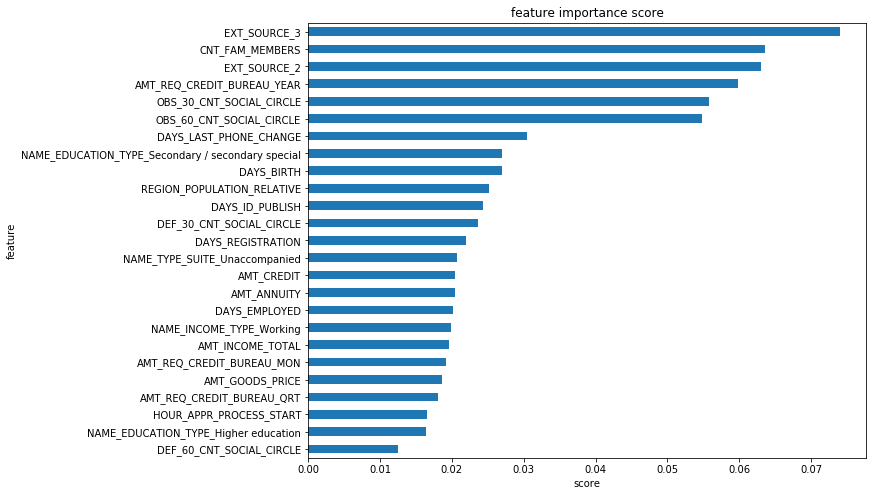

In [59]:
show_feature_importance(rf)

In [75]:
# Cek overfitting
# print the scores on training and test set

overfitting_check(rf, X_train, y_train, X_val, y_val, "precision")

precision score of train data:  1.0
precision score of val data:  0.9802323966483033


In [60]:
# Boosting (XGBoost)

from xgboost import XGBClassifier
xg = XGBClassifier(random_state=50)
xg.fit(X_train, y_train)

xg_pred = xg.predict(X_val)
eval_classification(xg, xg_pred, X_train, y_train, X_val, y_val)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:42:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy (Test Set): 0.9521
Precision (Test Set): 0.9951
Recall (Test Set): 0.9084
F1-Score (Test Set): 0.9498
AUC: 0.95


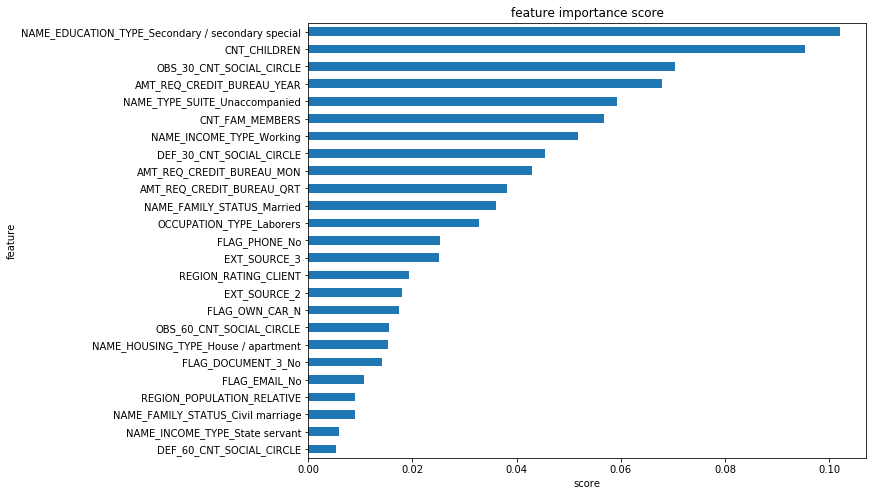

In [61]:
show_feature_importance(xg)

In [76]:
# Cek overfitting
# print the scores on training and test set

overfitting_check(xg, X_train, y_train, X_val, y_val, "precision")

precision score of train data:  0.9978817739707743
precision score of val data:  0.9951059218345801


In [77]:
xg.feature_importances_

array([0.09537128, 0.00183119, 0.00184998, 0.00162456, 0.00251235,
       0.00900138, 0.0019492 , 0.00214523, 0.0011978 , 0.00191808,
       0.0567079 , 0.01928812, 0.00219252, 0.00273339, 0.01809907,
       0.0251889 , 0.07050331, 0.04555032, 0.01559523, 0.00543085,
       0.00424376, 0.        , 0.        , 0.        , 0.04294902,
       0.03815546, 0.0678577 , 0.00240061, 0.        , 0.00430303,
       0.        , 0.01749023, 0.        , 0.00328173, 0.        ,
       0.        , 0.0009595 , 0.        , 0.00158548, 0.0024074 ,
       0.0006824 , 0.05923089, 0.        , 0.00127996, 0.        ,
       0.        , 0.00584228, 0.        , 0.00048509, 0.05182732,
       0.00035857, 0.00069554, 0.00107439, 0.00120532, 0.10201506,
       0.00896209, 0.03602866, 0.00156662, 0.00294375, 0.0038798 ,
       0.        , 0.01526991, 0.00129452, 0.00069282, 0.00101562,
       0.0037984 , 0.00118447, 0.00075029, 0.00076801, 0.0009644 ,
       0.00232434, 0.        , 0.00121026, 0.        , 0.03283

In [81]:
feat_importance = pd.Series(xg.feature_importances_, index=X_train.columns)

In [86]:
feat_importance.nlargest(25)

NAME_EDUCATION_TYPE_Secondary / secondary special    0.102015
CNT_CHILDREN                                         0.095371
OBS_30_CNT_SOCIAL_CIRCLE                             0.070503
AMT_REQ_CREDIT_BUREAU_YEAR                           0.067858
NAME_TYPE_SUITE_Unaccompanied                        0.059231
CNT_FAM_MEMBERS                                      0.056708
NAME_INCOME_TYPE_Working                             0.051827
DEF_30_CNT_SOCIAL_CIRCLE                             0.045550
AMT_REQ_CREDIT_BUREAU_MON                            0.042949
AMT_REQ_CREDIT_BUREAU_QRT                            0.038155
NAME_FAMILY_STATUS_Married                           0.036029
OCCUPATION_TYPE_Laborers                             0.032834
FLAG_PHONE_No                                        0.025298
EXT_SOURCE_3                                         0.025189
REGION_RATING_CLIENT                                 0.019288
EXT_SOURCE_2                                         0.018099
FLAG_OWN

In [100]:
X_new = X_smote[sorted(feat_importance.nlargest(25).index)]

In [101]:
X_new.head()

,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_CHILDREN,CNT_FAM_MEMBERS,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_3_No,FLAG_EMAIL_No,FLAG_OWN_CAR_N,FLAG_PHONE_No,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_HOUSING_TYPE_House / apartment,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Working,NAME_TYPE_SUITE_Unaccompanied,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,OCCUPATION_TYPE_Laborers,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT
0,-0.383927,-0.421208,-1.147895,-0.532302,-0.157838,-0.377107,-0.315327,0.840045,0.345499,0,1,1,0,0,0,1,1,1,0,0,-0.110173,-0.101720,0,-1.550538,-2.357318
1,-0.383927,-0.421208,-1.147895,-0.532302,-1.418667,-0.377107,-0.315327,0.491917,1.474581,1,1,0,0,1,0,0,1,0,1,1,-0.714096,-0.711518,1,-0.890804,-0.077012
2,-0.383927,-0.421208,-0.477091,-0.532302,-0.157838,-0.377107,-0.315327,0.988021,0.345499,0,1,1,1,1,1,0,1,0,1,1,0.493751,0.508079,1,-1.095402,-0.077012
3,-0.383927,-0.421208,-1.147895,-0.532302,-1.418667,-0.377107,-0.315327,-0.731813,0.345499,1,1,1,1,1,0,0,1,0,1,1,-0.714096,-0.711518,0,1.002820,-0.077012
4,-0.383927,1.748561,-0.477091,-0.532302,-0.157838,-0.377107,-0.315327,-0.566567,0.844982,0,1,1,0,1,0,1,1,1,0,0,-0.714096,-0.711518,1,1.727399,-0.077012


In [102]:
X_train_new, X_val_new, y_train_new, y_val_new = train_test_split(X_new, y_smote, test_size=0.2, random_state=13)

In [124]:
xg = XGBClassifier(random_state=50)
xg_model = xg.fit(X_train_new, y_train_new)

xg_pred_new = xg_model.predict(X_val_new)
eval_classification(xg_model, xg_pred_new, X_train_new, y_train_new, X_val_new, y_val_new)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:02:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy (Test Set): 0.9530
Precision (Test Set): 0.9983
Recall (Test Set): 0.9073
F1-Score (Test Set): 0.9506
AUC: 0.95


In [104]:
overfitting_check(xg_model, X_train_new, y_train_new, X_val_new, y_val_new, "precision")

precision score of train data:  0.999237041351194
precision score of val data:  0.9982912385009715


In [132]:
pd.Series(xg_pred_new).value_counts()

0    51521
1    42721
dtype: int64

In [156]:
pd.Series(y_val_new).value_counts()

0    47237
1    47005
Name: TARGET, dtype: int64

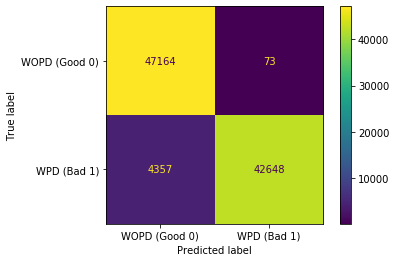

In [159]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_val_new, xg_pred_new)
cmd = ConfusionMatrixDisplay(cm, display_labels=['WOPD (Good 0)','WPD (Bad 1)'])
cmd.plot()

In [105]:
X_new.columns

Index(['AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'FLAG_DOCUMENT_3_No', 'FLAG_EMAIL_No', 'FLAG_OWN_CAR_N',
       'FLAG_PHONE_No', 'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Married',
       'NAME_HOUSING_TYPE_House / apartment', 'NAME_INCOME_TYPE_State servant',
       'NAME_INCOME_TYPE_Working', 'NAME_TYPE_SUITE_Unaccompanied',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'OCCUPATION_TYPE_Laborers', 'REGION_POPULATION_RELATIVE',
       'REGION_RATING_CLIENT'],
      dtype='object')

### Predict Using Test Data (Unlabel data)

In [163]:
test = pd.read_csv("application_test.csv")
test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

In [164]:
test.shape

(48744, 121)

In [165]:
test = test[["NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_TYPE_SUITE", "NAME_INCOME_TYPE",
          "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START",
           "FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE",
             "FLAG_PHONE", "FLAG_EMAIL","REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION",
             "LIVE_REGION_NOT_WORK_REGION", "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY",
              "LIVE_CITY_NOT_WORK_CITY","FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4",
              "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8",
              "FLAG_DOCUMENT_9","FLAG_DOCUMENT_10","FLAG_DOCUMENT_11","FLAG_DOCUMENT_12",
               "FLAG_DOCUMENT_13","FLAG_DOCUMENT_14","FLAG_DOCUMENT_15","FLAG_DOCUMENT_16",
               "FLAG_DOCUMENT_17","FLAG_DOCUMENT_18","FLAG_DOCUMENT_19","FLAG_DOCUMENT_20",
               "FLAG_DOCUMENT_21", 'CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE',
                'REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH',
                'CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','HOUR_APPR_PROCESS_START',
                'EXT_SOURCE_2','EXT_SOURCE_3','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
                'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE',
                'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
                'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT',
                'AMT_REQ_CREDIT_BUREAU_YEAR']]

In [166]:
test.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Married,House / apartment,NaN,TUESDAY,1,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,135000.0,568800.0,20560.5,450000.0,0.018850,-19241,-2329,-5170.0,-812,2.0,2,2,18,0.789654,0.159520,0.0,0.0,0.0,0.0,-1740.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Low-skill Laborers,FRIDAY,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99000.0,222768.0,17370.0,180000.0,0.035792,-18064,-4469,-9118.0,-1623,2.0,2,2,9,0.291656,0.432962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,Cash loans,M,Y,Y,NaN,Working,Higher education,Married,House / apartment,Drivers,MONDAY,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,202500.0,663264.0,69777.0,630000.0,0.019101,-20038,-4458,-2175.0,-3503,2.0,2,2,14,0.699787,0.610991,0.0,0.0,0.0,0.0,-856.0,0.0,0.0,0.0,0.0,1.0,4.0
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Sales staff,WEDNESDAY,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,-13976,-1866,-2000.0,-4208,4.0,2,2,11,0.509677,0.612704,0.0,0.0,0.0,0.0,-1805.0,0.0,0.0,0.0,0.0,0.0,3.0
4,Cash loans,M,Y,N,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,NaN,FRIDAY,1,1,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,180000.0,625500.0,32067.0,625500.0,0.010032,-13040,-2191,-4000.0,-4262,3.0,2,2,5,0.425687,NaN,0.0,0.0,0.0,0.0,-821.0,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
# change into cat col
for col in bincol:
    test[col] = test[col].replace({0:'No'})
    test[col] = test[col].replace({1:'Yes'})

In [168]:
# feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
test[numcol] = sc.fit_transform(test[numcol])

In [169]:
test.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Married,House / apartment,NaN,TUESDAY,Yes,Yes,No,Yes,No,Yes,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,-0.559988,-0.427809,0.142475,-0.553548,-0.037477,-0.164654,-0.733477,-0.483656,-0.056958,1.427241,-0.164830,-0.073004,-0.024421,1.828060,1.498449,-1.797329,-0.40123,-0.279257,-0.401034,-0.250477,-0.753470,-0.045458,-0.039094,-0.05158,-0.083829,-0.788843,-1.078809
1,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Low-skill Laborers,FRIDAY,Yes,Yes,No,Yes,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,-0.559988,-0.782413,-0.804537,-0.752753,-0.839362,1.009586,-0.461392,-0.498482,-1.168264,0.910437,-0.164830,-0.073004,-0.024421,-0.917400,-1.248732,-0.354330,-0.40123,-0.279257,-0.401034,-0.250477,1.226251,-0.045458,-0.039094,-0.05158,-0.083829,-0.788843,0.552645
2,Cash loans,M,Y,Y,NaN,Working,Higher education,Married,House / apartment,Drivers,MONDAY,Yes,Yes,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,-0.559988,0.237075,0.401002,2.519371,0.497113,-0.147258,-0.917718,-0.498406,0.786092,-0.287579,-0.164830,-0.073004,-0.024421,0.607856,1.002700,0.585162,-0.40123,-0.279257,-0.401034,-0.250477,0.252319,-0.045458,-0.039094,-0.05158,-0.083829,0.653540,1.096463
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Sales staff,WEDNESDAY,Yes,Yes,No,Yes,Yes,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,2.260729,1.345214,2.896221,1.223277,3.303709,0.358078,0.483623,-0.480449,0.835352,-0.736836,2.081317,-0.073004,-0.024421,-0.307298,-0.046029,0.594202,-0.40123,-0.279257,-0.401034,-0.250477,-0.827425,-0.045458,-0.039094,-0.05158,-0.083829,-0.788843,0.552645
4,Cash loans,M,Y,N,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,NaN,FRIDAY,Yes,Yes,Yes,Yes,No,No,No,No,No,No,Yes,Yes,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0.850370,0.015447,0.297651,0.164881,0.483748,-0.775825,0.699997,-0.482700,0.272381,-0.771247,0.958244,-0.073004,-0.024421,-2.137605,-0.509354,NaN,-0.40123,-0.279257,-0.401034,-0.250477,0.292141,NaN,NaN,NaN,NaN,NaN,NaN


In [170]:
oneHotCols = catcol
test = pd.get_dummies(test, columns=oneHotCols)
test.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,FLAG_MOBIL_No,FLAG_MOBIL_Yes,FLAG_EMP_PHONE_No,FLAG_EMP_PHONE_Yes,FLAG_WORK_PHONE_No,FLAG_WORK_PHONE_Yes,FLAG_CONT_MOBILE_No,FLAG_CONT_MOBILE_Yes,FLAG_PHONE_No,FLAG_PHONE_Yes,FLAG_EMAIL_No,FLAG_EMAIL_Yes,REG_REGION_NOT_LIVE_REGION_No,REG_REGION_NOT_LIVE_REGION_Yes,REG_REGION_NOT_WORK_REGION_No,REG_REGION_NOT_WORK_REGION_Yes,LIVE_REGION_NOT_WORK_REGION_No,LIVE_REGION_NOT_WORK_REGION_Yes,REG_CITY_NOT_LIVE_CITY_No,REG_CITY_NOT_LIVE_CITY_Yes,REG_CITY_NOT_WORK_CITY_No,REG_CITY_NOT_WORK_CITY_Yes,LIVE_CITY_NOT_WORK_CITY_No,LIVE_CITY_NOT_WORK_CITY_Yes,FLAG_DOCUMENT_2_No,FLAG_DOCUMENT_3_No,FLAG_DOCUMENT_3_Yes,FLAG_DOCUMENT_4_No,FLAG_DOCUMENT_4_Yes,FLAG_DOCUMENT_5_No,FLAG_DOCUMENT_5_Yes,FLAG_DOCUMENT_6_No,FLAG_DOCUMENT_6_Yes,FLAG_DOCUMENT_7_No,FLAG_DOCUMENT_7_Yes,FLAG_DOCUMENT_8_No,FLAG_DOCUMENT_8_Yes,FLAG_DOCUMENT_9_No,FLAG_DOCUMENT_9_Yes,FLAG_DOCUMENT_10_No,FLAG_DOCUMENT_11_No,FLAG_DOCUMENT_11_Yes,FLAG_DOCUMENT_12_No,FLAG_DOCUMENT_13_No,FLAG_DOCUMENT_14_No,FLAG_DOCUMENT_15_No,FLAG_DOCUMENT_16_No,FLAG_DOCUMENT_17_No,FLAG_DOCUMENT_18_No,FLAG_DOCUMENT_18_Yes,FLAG_DOCUMENT_19_No,FLAG_DOCUMENT_20_No,FLAG_DOCUMENT_21_No
0,-0.559988,-0.427809,0.142475,-0.553548,-0.037477,-0.164654,-0.733477,-0.483656,-0.056958,1.427241,-0.164830,-0.073004,-0.024421,1.828060,1.498449,-1.797329,-0.40123,-0.279257,-0.401034,-0.250477,-0.753470,-0.045458,-0.039094,-0.05158,-0.083829,-0.788843,-1.078809,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,0,0,1,1,0,1,0,1,

In [171]:
test = test[sorted(feat_importance.nlargest(25).index)]

In [172]:
test.head()

,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_CHILDREN,CNT_FAM_MEMBERS,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_3_No,FLAG_EMAIL_No,FLAG_OWN_CAR_N,FLAG_PHONE_No,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_HOUSING_TYPE_House / apartment,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Working,NAME_TYPE_SUITE_Unaccompanied,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,OCCUPATION_TYPE_Laborers,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT
0,-0.083829,-0.788843,-1.078809,-0.559988,-0.164830,-0.279257,-0.250477,1.498449,-1.797329,0,0,1,1,0,0,1,1,0,1,1,-0.40123,-0.401034,0,-0.164654,-0.073004
1,-0.083829,-0.788843,0.552645,-0.559988,-0.164830,-0.279257,-0.250477,-1.248732,-0.354330,0,1,1,1,1,0,1,1,0,1,1,-0.40123,-0.401034,0,1.009586,-0.073004
2,-0.083829,0.653540,1.096463,-0.559988,-0.164830,-0.279257,-0.250477,1.002700,0.585162,1,1,0,1,0,0,1,1,0,1,0,-0.40123,-0.401034,0,-0.147258,-0.073004
3,-0.083829,-0.788843,0.552645,2.260729,2.081317,-0.279257,-0.250477,-0.046029,0.594202,0,1,1,0,1,0,1,1,0,1,1,-0.40123,-0.401034,0,0.358078,-0.073004
4,NaN,NaN,NaN,0.850370,0.958244,-0.279257,-0.250477,-0.509354,NaN,0,1,0,1,1,0,1,1,0,1,1,-0.40123,-0.401034,0,-0.775825,-0.073004


In [173]:
xg_pred_test = xg_model.predict(test)

In [174]:
result = pd.Series(xg_pred_test)

In [175]:
result.value_counts()

1    48744
dtype: int64